In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
positions  = pd.read_csv('xt_pos_df.csv',index_col=0)

In [14]:
position_table = positions.T.copy()
position_table['ccy'] = 'USD' + position_table.index + ' Curncy'
position_table.set_index('ccy', inplace=True)
position_table.columns = pd.to_datetime(position_table.columns)

position_table.columns = position_table.columns.map(lambda x: x.strftime('%Y-%m'))

In [15]:
df = pd.read_excel('Monthly Data.xlsx', sheet_name=0, index_col = 0).iloc[2:,:]
df_1mpoints = pd.read_excel('Monthly Data.xlsx', sheet_name=1, index_col = 0).iloc[2:,:]
df = df.astype(float)
df_1mpoints = df_1mpoints.astype(float)
return_table = np.log(df/df.shift(-1)).dropna()

return_table = return_table.set_index(return_table.index.map(lambda x: x.strftime('%Y-%m')))

In [16]:
# Constrct 1m points
points_table = pd.DataFrame()
for i in range(len(df_1mpoints)):
    zz  = df.iloc[i:i+1,:].T.reset_index().iloc[:,1:] / df_1mpoints.iloc[i:i+1,:].T.reset_index().iloc[:,1:] - 1
    points_table = points_table.append(zz.T)
points_table.columns = df.columns

points_table = points_table.set_index(points_table.index.map(lambda x: x.strftime('%Y-%m')))

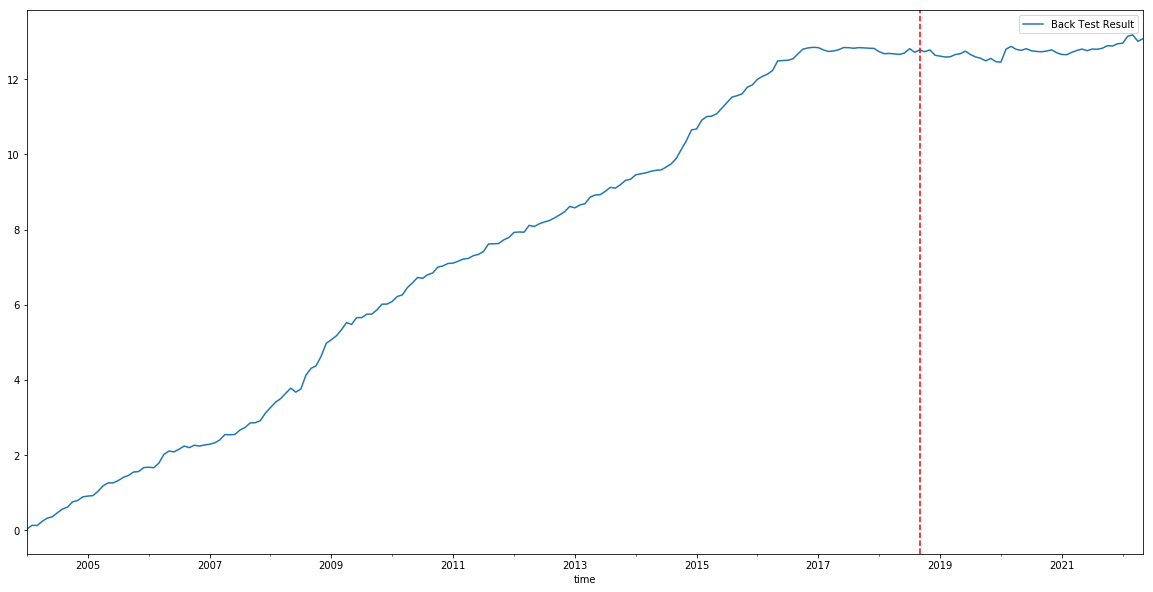

In [17]:
number_of_pairs = 3
x_date = '2018-09-30' # time for train/test data split
import PnL_Calc
# Compound Return will need the fifth parameter in PnL function as 1, default method is simple return if there is no the fifth parameter
# Sixth parameter: default = 0 (long short ccy); = 1 (long ccy only); = 2 (short ccy only)
Mothly_return, Accum_monthly_return, ccy_pairs_table, Summary_Table = PnL_Calc.PnL(position_table, return_table, points_table, number_of_pairs,x_date, 0, 0)

Accum_return_df = pd.DataFrame(Accum_monthly_return.sum(),columns = ['Back Test Result'])
Accum_return_df['time'] = pd.to_datetime(Accum_monthly_return.sum().index).to_period('M')
Accum_return_df.set_index('time').plot(figsize=(20, 10))
plt.axvline(x = x_date, color = 'red', linestyle = '--')
plt.show()

In [18]:
# Return breakdown by ccy contribution
final_return = Accum_monthly_return.iloc[:,-1:].dropna()
final_return.columns = ['Final Return']
final_return.sort_values(by = 'Final Return',ascending = False).style.background_gradient(axis=0)  

,Final Return
ccy,
USDBRL Curncy,2.229946
USDRUB Curncy,1.688033
USDPLN Curncy,1.398458
USDZAR Curncy,1.275837
USDJPY Curncy,1.248470
USDCOP Curncy,0.914292
USDCZK Curncy,0.745405
USDEUR Curncy,0.636626
USDCLP Curncy,0.475899


In [19]:
Summary_Table

,Whole Period,Train Period,Test Period
Accumulative Return,13.075379,12.776418,0.271370
Annulized Return,0.709975,0.866198,0.074010
Monthly Vol,0.082470,0.077893,0.079844
Annulized Vol,0.285683,0.269829,0.276588
Sharp Ratio,2.485183,3.210179,0.267582
Sortino Ratio,5.461833,8.533123,0.491637
Max Drawdown,0.394634,0.188242,0.313484


In [20]:
missing_Date = list(set(position_table.columns) - set(Mothly_return.columns))
missing_Date.sort()
missing_Date


[]